In [1]:
import numpy as np
import pylab as plt
import networkx as nx


In [2]:
points_list = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]

goal = 7
mapping = {0: 'Start', 1: '1', 2: '2', 3: '3',
           4: '4', 5: '5', 6: '6', 7: '7-Destination'}

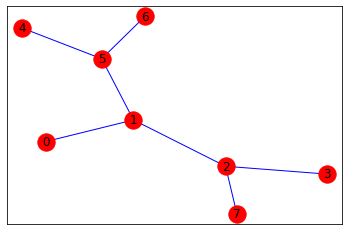

In [3]:
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G, k=.5, center=points_list[2])
nx.draw_networkx_nodes(G, pos, node_color='r')
nx.draw_networkx_edges(G, pos, edge_color='b')
nx.draw_networkx_labels(G, pos)
plt.show()

In [4]:
NO_OF_POINTS = 8

In [5]:
R = np.matrix(np.ones(shape=(NO_OF_POINTS, NO_OF_POINTS)))
R *= -1

for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 150
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 150
    else:
        # reverse of point
        R[point[::-1]] = 0


R[goal, goal] = 150

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [6]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 150.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 150.]])

In [7]:
Q = np.matrix(np.zeros([NO_OF_POINTS, NO_OF_POINTS]))

In [8]:
gamma = 0.8

initial_state = 1

In [9]:
def available_actions(state):
    current_state_row = R[state, ]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [10]:
available_act = available_actions(initial_state)


In [11]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action


In [12]:
action = sample_next_action(available_act)


In [13]:
def update(current_state, action, gamma):
    max_index = (np.where(Q[action, ] == np.max(Q[action, ]))[1])
    if (max_index.shape[0] > 1):
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)


In [14]:
update(initial_state, action, gamma)


max_value 0.0


0

In [15]:
scores = []

for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    print('Score:', str(score))

    print("Trained Q matrix:")
    print(Q/np.max(Q)*100)

max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q m

max_value 0.0
Score: 539.2
Trained Q matrix:
[[  0.   64.    0.    0.    0.    0.    0.    0. ]
 [ 51.2   0.   80.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.   64.    0.    0.    0.  100. ]
 [  0.    0.   80.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.  100. ]]
max_value 292.8
Score: 539.2
Trained Q matrix:
[[  0.   64.    0.    0.    0.    0.    0.    0. ]
 [ 51.2   0.   80.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.   64.    0.    0.    0.  100. ]
 [  0.    0.   80.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.  100. ]]
max_value 234.24
Score: 539.2
Trained Q matrix:
[[  0.   64.    0.    0.    0.    0.    0.

Trained Q matrix:
[[  0.          59.2113671    0.           0.           0.
    0.           0.           0.        ]
 [ 47.36909368   0.          74.01420887   0.           0.
   47.36909368   0.           0.        ]
 [  0.          59.2113671    0.          59.2113671    0.
    0.           0.          97.94870556]
 [  0.           0.          78.35896445   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   47.36909368   0.           0.        ]
 [  0.          59.2113671    0.           0.          37.89527494
    0.          37.89527494   0.        ]
 [  0.           0.           0.           0.           0.
   47.36909368   0.           0.        ]
 [  0.           0.          78.35896445   0.           0.
    0.           0.         100.        ]]
max_value 567.0146511667201
Score: 930.7932363307293
Trained Q matrix:
[[  0.          59.2113671    0.           0.           0.
    0.           0.           0.   

<ipython-input-15-f779226fa0c8>:12: RuntimeWarning: invalid value encountered in true_divide
  print(Q/np.max(Q)*100)


max_value 342.7683139584001
Score: 920.9386695971709
Trained Q matrix:
[[  0.          57.96339285   0.           0.           0.
    0.           0.           0.        ]
 [ 46.37071428   0.          76.70742397   0.           0.
   46.37071428   0.           0.        ]
 [  0.          61.36593918   0.          57.96339285   0.
    0.           0.          95.88427997]
 [  0.           0.          76.70742397   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   46.37071428   0.           0.        ]
 [  0.          57.96339285   0.           0.          37.09657143
    0.          37.09657143   0.        ]
 [  0.           0.           0.           0.           0.
   46.37071428   0.           0.        ]
 [  0.           0.          76.70742397   0.           0.
    0.           0.         100.        ]]
max_value 342.7683139584001
Score: 920.9386695971709
Trained Q matrix:
[[  0.          57.96339285   0.         

Score: 939.5619230235125
Trained Q matrix:
[[  0.          60.93115536   0.           0.           0.
    0.           0.           0.        ]
 [ 46.04217313   0.          79.66549036   0.           0.
   46.04217313   0.           0.        ]
 [  0.          63.73239229   0.          60.93115536   0.
    0.           0.          99.58186295]
 [  0.           0.          79.66549036   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   46.04217313   0.           0.        ]
 [  0.          57.55271642   0.           0.          36.83373851
    0.          36.83373851   0.        ]
 [  0.           0.           0.           0.           0.
   46.04217313   0.           0.        ]
 [  0.           0.          79.66549036   0.           0.
    0.           0.         100.        ]]
max_value 474.46597677788725
Score: 942.3631599497143
Trained Q matrix:
[[  0.          63.73239229   0.           0.           0.
    0.   

Score: 981.5621011818444
Trained Q matrix:
[[  0.          63.99188292   0.           0.           0.
    0.           0.           0.        ]
 [ 51.19350634   0.          79.98985365   0.           0.
   51.19350634   0.           0.        ]
 [  0.          63.83894206   0.          63.99188292   0.
    0.           0.          99.98731706]
 [  0.           0.          79.98985365   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19350634   0.           0.        ]
 [  0.          63.99188292   0.           0.          40.5083035
    0.          40.5083035    0.        ]
 [  0.           0.           0.           0.           0.
   51.19350634   0.           0.        ]
 [  0.           0.          79.98985365   0.           0.
    0.           0.         100.        ]]
max_value 599.6197048199316
Score: 981.5621011818444
Trained Q matrix:
[[  0.          63.99188292   0.           0.           0.
    0.     

Trained Q matrix:
[[  0.          64.           0.           0.           0.
    0.           0.           0.        ]
 [ 51.2          0.          80.           0.           0.
   51.18415835   0.           0.        ]
 [  0.          63.98019794   0.          64.           0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.2          0.           0.        ]
 [  0.          64.           0.           0.          40.94732668
    0.          40.94732668   0.        ]
 [  0.           0.           0.           0.           0.
   51.2          0.           0.        ]
 [  0.           0.          79.97524743   0.           0.
    0.           0.          99.9918844 ]]
max_value 599.8052888678051
Score: 982.6261414917534
Trained Q matrix:
[[  0.          64.           0.           0.           0.
    0.           0.           0.   

    0.           0.         100.        ]]
max_value 479.92024632025306
Score: 982.6201358295807
Trained Q matrix:
[[  0.          63.99617142   0.           0.           0.
    0.           0.           0.        ]
 [ 51.18882798   0.          79.99521427   0.           0.
   51.17298979   0.           0.        ]
 [  0.          63.98603497   0.          63.99829841   0.
    0.           0.          99.99734126]
 [  0.           0.          79.99787301   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19693713   0.           0.        ]
 [  0.          63.99617142   0.           0.          40.95106238
    0.          40.95106238   0.        ]
 [  0.           0.           0.           0.           0.
   51.19693713   0.           0.        ]
 [  0.           0.          79.99521427   0.           0.
    0.           0.         100.        ]]
max_value 383.93619705620245
Score: 982.6201358295807
Trained Q matr

Score: 982.6685927836243
Trained Q matrix:
[[  0.          63.99919716   0.           0.           0.
    0.           0.           0.        ]
 [ 51.1989117    0.          79.99899644   0.           0.
   51.19263457   0.           0.        ]
 [  0.          63.99919716   0.          63.99863962   0.
    0.           0.          99.99874556]
 [  0.           0.          79.99899644   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19263457   0.           0.        ]
 [  0.          63.99079322   0.           0.          40.95410766
    0.          40.95410766   0.        ]
 [  0.           0.           0.           0.           0.
   51.19263457   0.           0.        ]
 [  0.           0.          79.99899644   0.           0.
    0.           0.         100.        ]]
max_value 599.9790930513765
Score: 982.6685927836243
Trained Q matrix:
[[  0.          63.99919716   0.           0.           0.
    0.    

[[  0.          64.           0.           0.           0.
    0.           0.           0.        ]
 [ 51.2          0.          80.           0.           0.
   51.19207745   0.           0.        ]
 [  0.          64.           0.          64.           0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19207745   0.           0.        ]
 [  0.          63.99009681   0.           0.          40.95366196
    0.          40.95366196   0.        ]
 [  0.           0.           0.           0.           0.
   51.19207745   0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.          99.99971455]]
max_value 383.93619705620245
Score: 982.6733676356832
Trained Q matrix:
[[  0.          64.           0.           0.           0.
    0.           0.           0.        ]
 [ 51.2   

In [16]:
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(
        Q[current_state, ] == np.max(Q[current_state, ]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index


print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 2, 7]


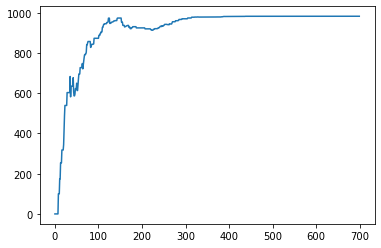

In [17]:
plt.plot(scores)
plt.show()